In [1]:
from pathlib import Path


DATA_DIR = Path.cwd()  # is recursive, subdirectories are also searched for correct .csv files automatically


def get_csv(filename_snippet: str) -> Path:
    files = list(DATA_DIR.rglob(f'{filename_snippet}*.csv'))
    if files:
        return files[0]
    else:
        raise FileNotFoundError(f'No .csv file found containing "{filename_snippet}"')

# City spending on education

**Base URL for proper table layout:**

https://iv3statline.cbs.nl/#/IV3/nl/dataset/45067NED/table?dl=A7760

**URLs for each year:**

2024 = 45067NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45067NED/table?dl=A7760

2023 = 45063NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45063NED/table?dl=A7760

2022 = 45059NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45059NED/table?dl=A7760

2021 = 45054NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45054NED/table?dl=A7760

2020 = 45050NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45050NED/table?dl=A7760

2019 = 45046NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45046NED/table?dl=A7760

2018 = 45042NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45042NED/table?dl=A7760

2017 = 45038NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45038NED/table?dl=A7760

**=== everything below has different schema, not used! ===**

2016 = 45031NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45031NED/table?dl=A7760

2015 = 45006NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45006NED/table?dl=A7760

2014 = 45005NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45005NED/table?dl=A7760

2013 = 45004NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45004NED/table?dl=A7760

2012 = 45001NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45001NED/table?dl=A7760

2011 = 45008NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45008NED/table?dl=A7760

2010 = 45007NED = https://iv3statline.cbs.nl/#/IV3/nl/dataset/45007NED/table?dl=A7760

In [2]:
from expenditure import get_expenses_df


get_expenses_df(DATA_DIR, only_begroting=True, only_total=True)

Total
Year Gemeenten                   
2017 Eindhoven            29157.0
     Utrecht (gemeente)   88079.0
2018 Eindhoven            29321.0
     Utrecht (gemeente)   92109.0
2019 Eindhoven            32866.0
     Utrecht (gemeente)   93655.0
2020 Eindhoven            32022.0
     Utrecht (gemeente)   89497.0
2021 Eindhoven            35376.0
     Utrecht (gemeente)   91749.0
2022 Eindhoven            49506.0
     Utrecht (gemeente)   96483.0
2023 Eindhoven            48603.0
     Utrecht (gemeente)  106822.0
2024 Eindhoven            58033.0
     Utrecht (gemeente)  110794.0

<Axes: xlabel='Year', ylabel='x1000 €'>

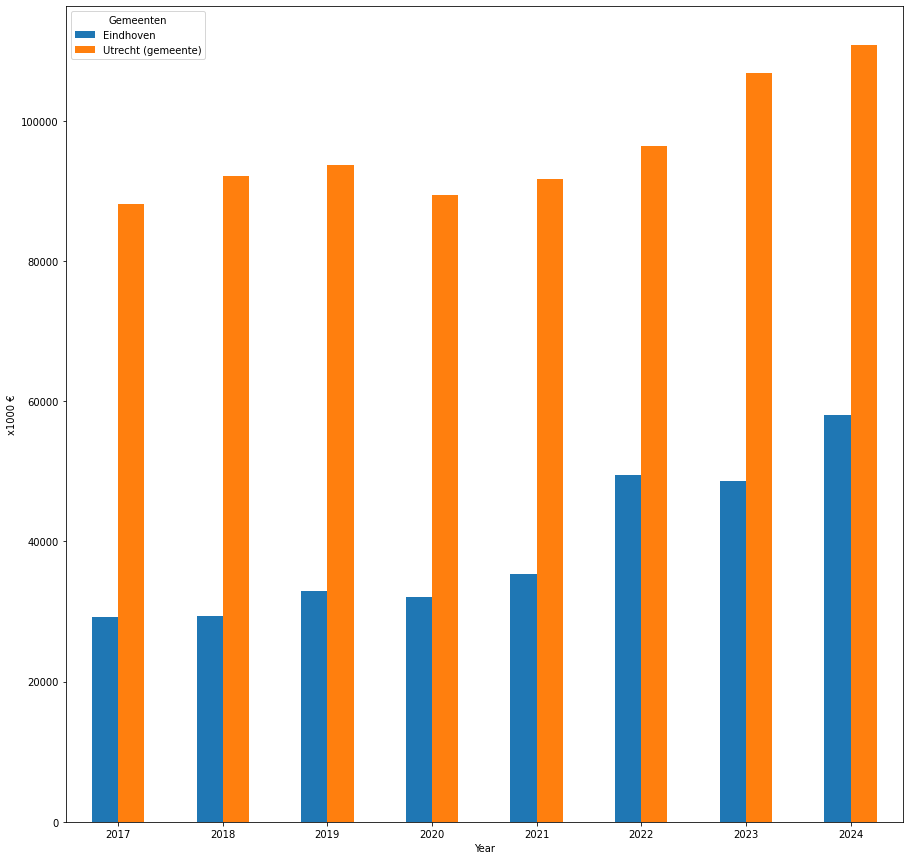

In [3]:
from expenditure import get_expenses_df, plot_expenses


ONLY_SHOW_PRED_EXPENSES = True  # useful since we don't have actual expenses data for 2023 & 2024

plot_expenses(get_expenses_df(DATA_DIR), only_show_begroting=ONLY_SHOW_PRED_EXPENSES)

# Enrollment rates

https://opendata.cbs.nl/#/CBS/nl/dataset/70072ned/table?dl=A7762

In [4]:
from enrollment import get_enrollment_df


get_enrollment_df(get_csv('Regionale_kerncijfers_'), get_csv('primary_education_'), get_csv('georef'))

Total  Primary  Secondary  MBO1  MBO Total  MBO2  \
Year Gemeenten                                                                
1995 Eindhoven               NaN      NaN        NaN   NaN        NaN   NaN   
     Utrecht (gemeente)      NaN      NaN        NaN   NaN        NaN   NaN   
1996 Eindhoven               NaN      NaN        NaN   NaN        NaN   NaN   
     Utrecht (gemeente)      NaN      NaN        NaN   NaN        NaN   NaN   
1997 Eindhoven               NaN      NaN        NaN   NaN        NaN   NaN   
...                          ...      ...        ...   ...        ...   ...   
2023 Zwartewaterland      2454.0   2454.0        NaN   NaN        NaN   NaN   
     Zwijndrecht          3923.0   3923.0        NaN   NaN        NaN   NaN   
     Zwolle              11888.0  11888.0        NaN   NaN        NaN   NaN   
2024 Eindhoven               NaN      NaN        NaN   NaN        NaN   NaN   
     Utrecht (gemeente)      NaN      NaN        NaN   NaN        NaN   NaN   

                         HBO  WO  
Year Gemeenten                    
1995 Eindhoven           NaN NaN  
     Utrecht (gemeente)  NaN NaN  
1996 Eindhoven           NaN NaN  
     Utrecht (gemeente)  NaN NaN  
1997 Eindhoven           NaN NaN  
...                      ...  ..  
2023 Zwartewaterland     NaN NaN  
     Zwijndrecht         NaN NaN  
     Zwolle              NaN NaN  
2024 Eindhoven           NaN NaN  
     Utrecht (gemeente)  NaN NaN  

[4776 rows x 8 columns]

<Axes: title={'center': 'Total enrollment'}, xlabel='Year', ylabel='Students'>

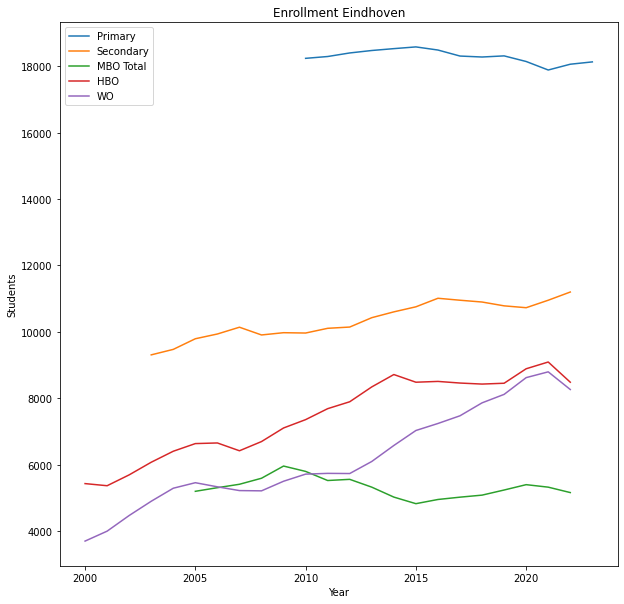

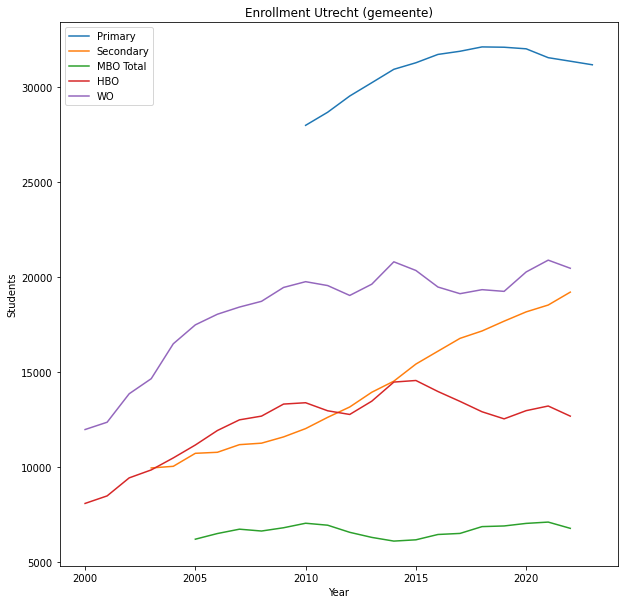

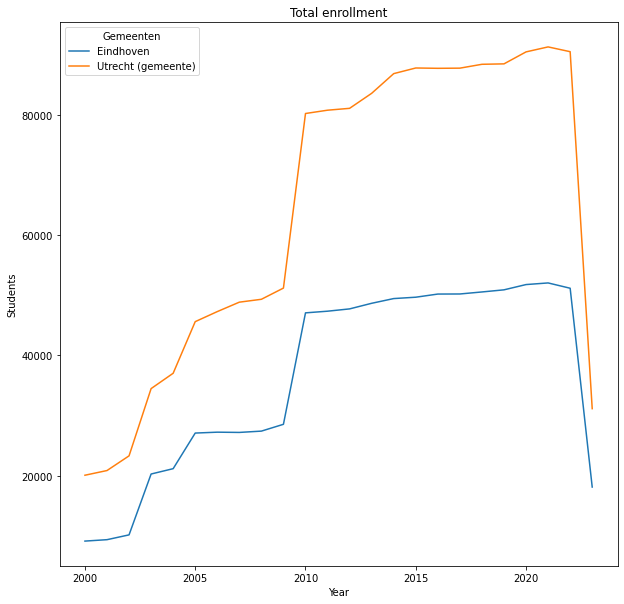

In [5]:
from enrollment import get_enrollment_df, plot_enrollment_city, plot_enrollment_total


df = get_enrollment_df(get_csv('Regionale_kerncijfers_'), get_csv('primary_education_'), get_csv('georef'))

for plot in plot_enrollment_city(df, ['Utrecht (gemeente)', 'Eindhoven'], kind='line'):
    pass  # so long as the plot is 'accessed', the notebook will display it

plot_enrollment_total(df, ['Utrecht (gemeente)', 'Eindhoven'], kind='line')

### Split-out secondary enrollment rates

In [6]:
from enrollment import get_secondary_enrollment_df


get_secondary_enrollment_df(get_csv('enrollment-secondary'), split_vmbo=False)

AANTAL LEERLINGEN
Year Gemeenten     Type                       
2014 's-gravenhage HAVO                   2916
                   HAVO/VWO              12880
                   PRAKTIJK               1084
                   VMBO                   5110
                   VWO                    3306
...                                        ...
2018 Zwolle        HAVO                   1766
                   HAVO/VWO               6444
                   PRAKTIJK                276
                   VMBO                   2756
                   VWO                    1903

[6781 rows x 1 columns]

# Socio-economic status (expressed as child poverty rate)

https://opendata.cbs.nl/statline/#/CBS/nl/dataset/85678NED/table?dl=A7771

In [7]:
from socioecon import get_poverty_df


get_poverty_df(get_csv('Laag_en_langdurig_laag_inkomen_'), only_total=True)

Minderjarige kinderen
Year Gemeenten                                
2011 Eindhoven                            37.7
     Utrecht (gemeente)                   58.1
2012 Eindhoven                            38.0
     Utrecht (gemeente)                   59.7
2013 Eindhoven                            38.0
     Utrecht (gemeente)                   61.2
2014 Eindhoven                            38.1
     Utrecht (gemeente)                   63.0
2015 Eindhoven                            38.3
     Utrecht (gemeente)                   64.2
2016 Eindhoven                            38.3
     Utrecht (gemeente)                   65.4
2017 Eindhoven                            38.2
     Utrecht (gemeente)                   66.3
2018 Eindhoven                            38.0
     Utrecht (gemeente)                   67.0
2019 Eindhoven                            38.1
     Utrecht (gemeente)                   67.7
2020 Eindhoven                            38.2
     Utrecht (gemeente)                   68.3
2021 Eindhoven                            38.0
     Utrecht (gemeente)                   68.4
2022 Eindhoven                            37.9
     Utrecht (gemeente)                   68.3

In [8]:
from merging import get_merged_df


merged_df = get_merged_df(
    DATA_DIR,
    get_csv('Regionale_kerncijfers_'), get_csv('primary_education_'), get_csv('georef'),
    get_csv('Laag_en_langdurig_laag_inkomen_'),
)
merged_df

Total enrollment  Primary  Secondary  MBO1  \
Year Gemeenten                                                        
1995 Eindhoven                        NaN      NaN        NaN   NaN   
     Utrecht (gemeente)               NaN      NaN        NaN   NaN   
1996 Eindhoven                        NaN      NaN        NaN   NaN   
     Utrecht (gemeente)               NaN      NaN        NaN   NaN   
1997 Eindhoven                        NaN      NaN        NaN   NaN   
...                                   ...      ...        ...   ...   
2023 Zwartewaterland               2454.0   2454.0        NaN   NaN   
     Zwijndrecht                   3923.0   3923.0        NaN   NaN   
     Zwolle                       11888.0  11888.0        NaN   NaN   
2024 Eindhoven                        NaN      NaN        NaN   NaN   
     Utrecht (gemeente)               NaN      NaN        NaN   NaN   

                         MBO Total  MBO2  HBO  WO  Education expenses  \
Year Gemeenten                                                          
1995 Eindhoven                 NaN   NaN  NaN NaN                 NaN   
     Utrecht (gemeente)        NaN   NaN  NaN NaN                 NaN   
1996 Eindhoven                 NaN   NaN  NaN NaN                 NaN   
     Utrecht (gemeente)        NaN   NaN  NaN NaN                 NaN   
1997 Eindhoven                 NaN   NaN  NaN NaN                 NaN   
...                            ...   ...  ...  ..                 ...   
2023 Zwartewaterland           NaN   NaN  NaN NaN                 NaN   
     Zwijndrecht               NaN   NaN  NaN NaN                 NaN   
     Zwolle                    NaN   NaN  NaN NaN                 NaN   
2024 Eindhoven                 NaN   NaN  NaN NaN             58033.0   
     Utrecht (gemeente)        NaN   NaN  NaN NaN            110794.0   

                         Impoverished children  
Year Gemeenten                                  
1995 Eindhoven                             NaN  
     Utrecht (gemeente)                    NaN  
1996 Eindhoven                             NaN  
     Utrecht (gemeente)                    NaN  
1997 Eindhoven                             NaN  
...                                        ...  
2023 Zwartewaterland                       NaN  
     Zwijndrecht                           NaN  
     Zwolle                                NaN  
2024 Eindhoven                             NaN  
     Utrecht (gemeente)                    NaN  

[4776 rows x 10 columns]

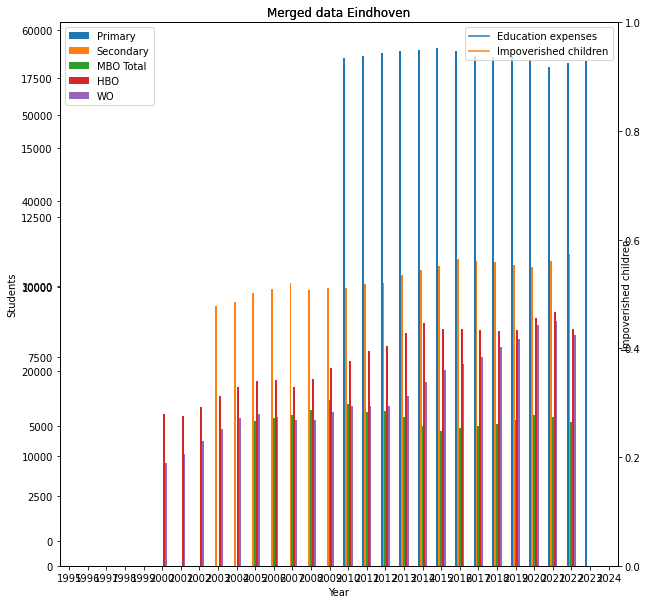

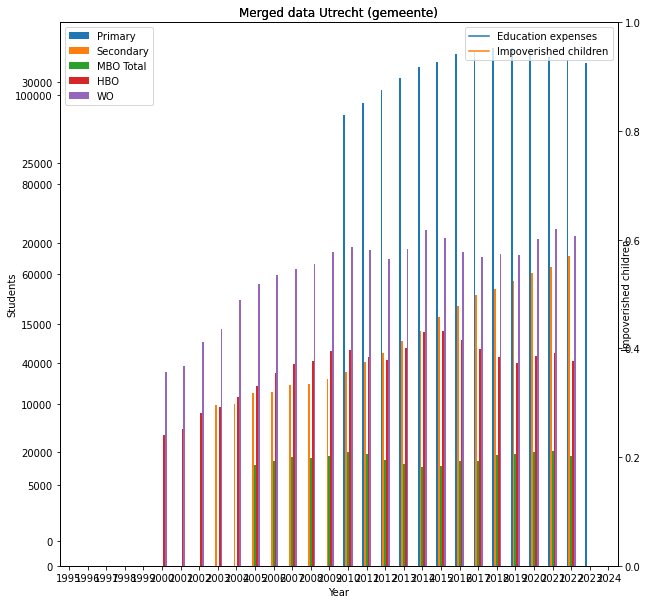

In [9]:
from merging import plot_merged_df


for plot in plot_merged_df(merged_df, cities=['Eindhoven', 'Utrecht (gemeente)']):
    pass